In [2]:
import pandas as pd
import geopandas as gpd
import json
import os
import folium
import numpy as np

In [8]:
# Step 2: Load the GeoJSON file as a GeoDataFrame
taz_gdf = gpd.read_file('data/WFv900_TAZ.geojson')
taz_gdf = taz_gdf[taz_gdf['DSUP_NAME']=='Salt Lake County']
taz_dsml_acres_df = taz_gdf[['TAZID','DISTSML','DSML_NAME','ACRES','DEVACRES']]
taz_dsml_acres_df

,TAZID,DISTSML,DSML_NAME,ACRES,DEVACRES
477,906,907,Small District 907,51609.638799,0.000000
478,907,271,Small District 271,10285.908874,0.000000
479,908,271,Small District 271,1150.210311,1069.695589
480,909,281,Small District 281,617.123966,586.267768
481,910,281,Small District 281,432.270229,0.000000
...,...,...,...,...,...
1783,2212,491,Small District 491,13610.874951,0.000000
1784,2213,491,Small District 491,8773.589741,0.000000
1785,2214,481,Small District 481,780.222190,0.000000
1786,2215,491,Small District 491,2069.304039,724.256414


In [13]:
_df1 = pd.read_csv('data/SE_2023.csv')
_df1['scenario'] = 'oy-2023'
_df2 = pd.read_csv('data/SE_2050.csv')
_df2['scenario'] = 'rtp-2050'

se_df = pd.concat([_df1, _df2])
se_df.rename(columns={';TAZID':'TAZID'}, inplace=True)

se_df = se_df[se_df['CO_FIPS']==35]

se_df

,TAZID,CO_TAZID,TOTHH,HHPOP,HHSIZE,TOTEMP,RETEMP,INDEMP,OTHEMP,ALLEMP,...,FM_MING,FM_CONS,HBJ,AVGINCOME,Enrol_Elem,Enrol_Midl,Enrol_High,CO_FIPS,CO_NAME,scenario
905,906,350001,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,45129.0,0.0,0.0,0.0,35,SALT LAKE,oy-2023
906,907,350002,0.0,0.0,0.0,878.666667,2.666667,432.166667,443.833333,933.055471,...,0.0,54.388804,0.0,45129.0,0.0,0.0,0.0,35,SALT LAKE,oy-2023
907,908,350003,0.0,0.0,0.0,215.833333,1.666667,137.500000,76.666667,220.986703,...,0.0,5.153370,0.0,45129.0,0.0,0.0,0.0,35,SALT LAKE,oy-2023
908,909,350004,0.0,0.0,0.0,174.000000,0.000000,131.333333,42.666667,178.154596,...,0.0,4.154596,0.0,45129.0,0.0,0.0,0.0,35,SALT LAKE,oy-2023
909,910,350005,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,79063.0,0.0,0.0,0.0,35,SALT LAKE,oy-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2212,351307,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,136616.0,0.0,0.0,0.0,35,SALT LAKE,rtp-2050
2212,2213,351308,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,136616.0,0.0,0.0,0.0,35,SALT LAKE,rtp-2050
2213,2214,351309,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,136616.0,0.0,0.0,0.0,35,SALT LAKE,rtp-2050
2214,2215,351310,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,154321.0,0.0,0.0,0.0,35,SALT LAKE,rtp-2050


In [14]:
hh_df = se_df[['scenario','TAZID','TOTHH', 'TOTEMP']]
hh_df

,scenario,TAZID,TOTHH,TOTEMP
905,oy-2023,906,0.0,0.000000
906,oy-2023,907,0.0,878.666667
907,oy-2023,908,0.0,215.833333
908,oy-2023,909,0.0,174.000000
909,oy-2023,910,0.0,0.000000
...,...,...,...,...
2211,rtp-2050,2212,0.0,0.000000
2212,rtp-2050,2213,0.0,0.000000
2213,rtp-2050,2214,0.0,0.000000
2214,rtp-2050,2215,0.0,0.000000


In [15]:
hh_devacres = pd.merge(hh_df, taz_dsml_acres_df, on='TAZID')
hh_devacres

,scenario,TAZID,TOTHH,TOTEMP,DISTSML,DSML_NAME,ACRES,DEVACRES
0,oy-2023,906,0.0,0.000000,907,Small District 907,51609.638799,0.000000
1,rtp-2050,906,0.0,0.000000,907,Small District 907,51609.638799,0.000000
2,oy-2023,907,0.0,878.666667,271,Small District 271,10285.908874,0.000000
3,rtp-2050,907,0.0,926.833333,271,Small District 271,10285.908874,0.000000
4,oy-2023,908,0.0,215.833333,271,Small District 271,1150.210311,1069.695589
...,...,...,...,...,...,...,...,...
2617,rtp-2050,2214,0.0,0.000000,481,Small District 481,780.222190,0.000000
2618,oy-2023,2215,0.0,0.000000,491,Small District 491,2069.304039,724.256414
2619,rtp-2050,2215,0.0,0.000000,491,Small District 491,2069.304039,724.256414
2620,oy-2023,2216,0.0,0.000000,491,Small District 491,17563.144822,0.000000


In [16]:
dsml_density_df = hh_devacres.groupby(['scenario', 'DISTSML', 'DSML_NAME'], as_index=False).agg(TOTHH=('TOTHH','sum'), TOTEMP=('TOTEMP','sum'), DEVACRES=('DEVACRES','sum'))
dsml_density_df['hh_per_acre'] = dsml_density_df['TOTHH'] / dsml_density_df['DEVACRES']
dsml_density_df['hh_job_per_acre'] = ((dsml_density_df['TOTHH'] * 1.8) + dsml_density_df['TOTEMP']) / dsml_density_df['DEVACRES']
dsml_density_df = dsml_density_df.replace([np.inf, -np.inf], np.nan).dropna()

dsml_density_df

,scenario,DISTSML,DSML_NAME,TOTHH,TOTEMP,DEVACRES,hh_per_acre,hh_job_per_acre
0,oy-2023,261,Small District 261,0.000000,31819.833333,11090.230472,0.000000,2.869177
1,oy-2023,271,Small District 271,5.000000,6346.166667,6712.584424,0.000745,0.946754
2,oy-2023,281,Small District 281,17071.000000,10484.333333,14367.905283,1.188134,2.868347
3,oy-2023,291,Small District 291,60.833333,18350.500000,8384.669450,0.007255,2.201637
4,oy-2023,292,Small District 292,11272.000000,14938.666667,4336.878668,2.599104,8.122954
...,...,...,...,...,...,...,...,...
92,rtp-2050,461,Small District 461,12948.333333,16559.000000,6830.185424,1.895751,5.836738
93,rtp-2050,471,Small District 471,42.700000,70.000000,3831.213602,0.011145,0.038333
94,rtp-2050,481,Small District 481,192.000000,232.500000,1855.724972,0.103464,0.311522
95,rtp-2050,491,Small District 491,258.100000,1021.100000,1307.116527,0.197458,1.136609


In [17]:
_df1 = pd.read_csv('data/OY_2023_ZoneSummary_TripsByMode.csv')
_df1['scenario'] = 'oy-2023'
_df2 = pd.read_csv('data/RTP_2050_ZoneSummary_TripsByMode.csv')
_df2['scenario'] = 'rtp-2050'

trips_by_mode_df = pd.concat([_df1,_df2])

trips_by_mode_df = trips_by_mode_df[(trips_by_mode_df['Purpose']=='All') & (trips_by_mode_df['Period']=='Dy')]

trips_by_mode_df = trips_by_mode_df[['scenario','TAZID','PA','Auto','tTrn','NonM','All']]

display(trips_by_mode_df)
#trips_by_mode_df.max()

,scenario,TAZID,PA,Auto,tTrn,NonM,All
79838,oy-2023,1.0,P,0.00,0.00,0.00,0.00
79839,oy-2023,1.0,A,0.00,0.00,0.00,0.00
79850,oy-2023,2.0,P,182.98,0.00,7.23,190.21
79851,oy-2023,2.0,A,28.88,0.00,6.33,35.21
79862,oy-2023,3.0,P,152.16,0.20,6.36,158.73
...,...,...,...,...,...,...,...
123351,rtp-2050,3627.0,A,0.00,0.00,0.00,0.00
123362,rtp-2050,3628.0,P,3193.54,126.87,0.00,3320.42
123363,rtp-2050,3628.0,A,0.00,0.00,0.00,0.00
123374,rtp-2050,3629.0,P,299.45,11.33,0.00,310.78


In [18]:
trips_by_mode_df.columns

Index(['scenario', 'TAZID', 'PA', 'Auto', 'tTrn', 'NonM', 'All'], dtype='object')

In [19]:
trips_by_mode_taz_df = pd.merge(trips_by_mode_df, taz_dsml_acres_df[['TAZID','DISTSML','DSML_NAME']])
trips_by_mode_taz_df

,scenario,TAZID,PA,Auto,tTrn,NonM,All,DISTSML,DSML_NAME
0,oy-2023,906.0,P,0.00,0.0,0.00,0.00,907,Small District 907
1,oy-2023,906.0,A,0.00,0.0,0.00,0.00,907,Small District 907
2,rtp-2050,906.0,P,0.00,0.0,0.00,0.00,907,Small District 907
3,rtp-2050,906.0,A,0.00,0.0,0.00,0.00,907,Small District 907
4,oy-2023,907.0,P,528.37,0.0,1.06,529.43,271,Small District 271
...,...,...,...,...,...,...,...,...,...
5239,rtp-2050,2215.0,A,0.00,0.0,0.00,0.00,491,Small District 491
5240,oy-2023,2216.0,P,0.00,0.0,0.00,0.00,491,Small District 491
5241,oy-2023,2216.0,A,0.00,0.0,0.00,0.00,491,Small District 491
5242,rtp-2050,2216.0,P,0.00,0.0,0.00,0.00,491,Small District 491


In [20]:
trips_dsml_df = trips_by_mode_taz_df.groupby(['scenario','DISTSML','DSML_NAME'], as_index=False).agg(NonM=('NonM','sum'),tTrn=('tTrn','sum'),Auto=('Auto','sum'),All=('All','sum'))

trips_dsml_df['NonM_pct'] = trips_dsml_df['NonM'] / trips_dsml_df['All']
trips_dsml_df['tTrn_pct'] = trips_dsml_df['tTrn'] / trips_dsml_df['All']
trips_dsml_df['Auto_pct'] = trips_dsml_df['Auto'] / trips_dsml_df['All']

trips_dsml_df

,scenario,DISTSML,DSML_NAME,NonM,tTrn,Auto,All,NonM_pct,tTrn_pct,Auto_pct
0,oy-2023,261,Small District 261,1035.99,146.22,86758.48,87940.66,0.011781,0.001663,0.986557
1,oy-2023,271,Small District 271,189.86,0.06,16342.07,16531.99,0.011484,0.000004,0.988512
2,oy-2023,281,Small District 281,36096.65,946.43,243281.49,280324.61,0.128767,0.003376,0.867856
3,oy-2023,291,Small District 291,1245.56,2652.19,70757.45,74655.17,0.016684,0.035526,0.947790
4,oy-2023,292,Small District 292,23251.69,4379.76,151482.03,179113.45,0.129815,0.024452,0.845732
...,...,...,...,...,...,...,...,...,...,...
93,rtp-2050,471,Small District 471,6.89,0.68,980.24,987.83,0.006975,0.000688,0.992316
94,rtp-2050,481,Small District 481,190.59,4.00,2857.93,3052.52,0.062437,0.001310,0.936253
95,rtp-2050,491,Small District 491,532.01,9.70,8680.60,9222.30,0.057687,0.001052,0.941262
96,rtp-2050,901,Small District 901,9.59,0.00,2646.40,2656.00,0.003611,0.000000,0.996386


In [21]:
dsml_density_trips_df = pd.merge(dsml_density_df, trips_dsml_df, on=(['scenario','DISTSML','DSML_NAME']))
dsml_density_trips_df

,scenario,DISTSML,DSML_NAME,TOTHH,TOTEMP,DEVACRES,hh_per_acre,hh_job_per_acre,NonM,tTrn,Auto,All,NonM_pct,tTrn_pct,Auto_pct
0,oy-2023,261,Small District 261,0.000000,31819.833333,11090.230472,0.000000,2.869177,1035.99,146.22,86758.48,87940.66,0.011781,0.001663,0.986557
1,oy-2023,271,Small District 271,5.000000,6346.166667,6712.584424,0.000745,0.946754,189.86,0.06,16342.07,16531.99,0.011484,0.000004,0.988512
2,oy-2023,281,Small District 281,17071.000000,10484.333333,14367.905283,1.188134,2.868347,36096.65,946.43,243281.49,280324.61,0.128767,0.003376,0.867856
3,oy-2023,291,Small District 291,60.833333,18350.500000,8384.669450,0.007255,2.201637,1245.56,2652.19,70757.45,74655.17,0.016684,0.035526,0.947790
4,oy-2023,292,Small District 292,11272.000000,14938.666667,4336.878668,2.599104,8.122954,23251.69,4379.76,151482.03,179113.45,0.129815,0.024452,0.845732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,rtp-2050,461,Small District 461,12948.333333,16559.000000,6830.185424,1.895751,5.836738,19757.61,1615.66,183367.41,204740.71,0.096501,0.007891,0.895608
90,rtp-2050,471,Small District 471,42.700000,70.000000,3831.213602,0.011145,0.038333,6.89,0.68,980.24,987.83,0.006975,0.000688,0.992316
91,rtp-2050,481,Small District 481,192.000000,232.500000,1855.724972,0.103464,0.311522,190.59,4.00,2857.93,3052.52,0.062437,0.001310,0.936253
92,rtp-2050,491,Small District 491,258.100000,1021.100000,1307.116527,0.197458,1.136609,532.01,9.70,8680.60,9222.30,0.057687,0.001052,0.941262


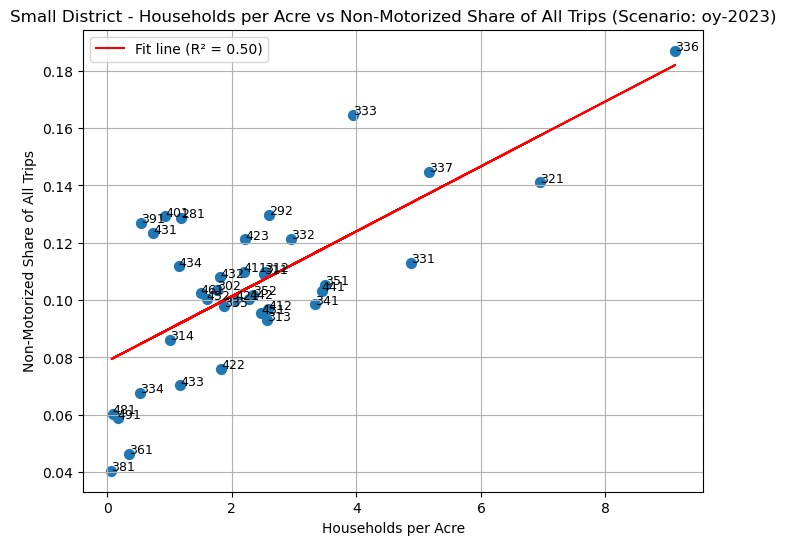

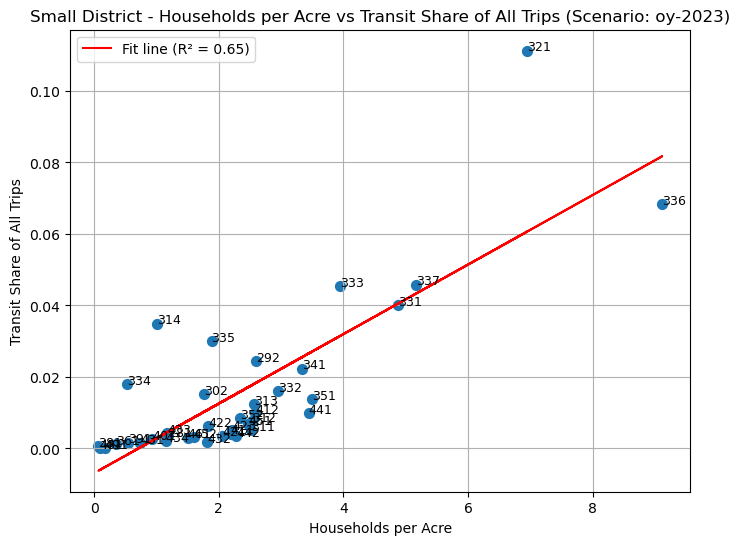

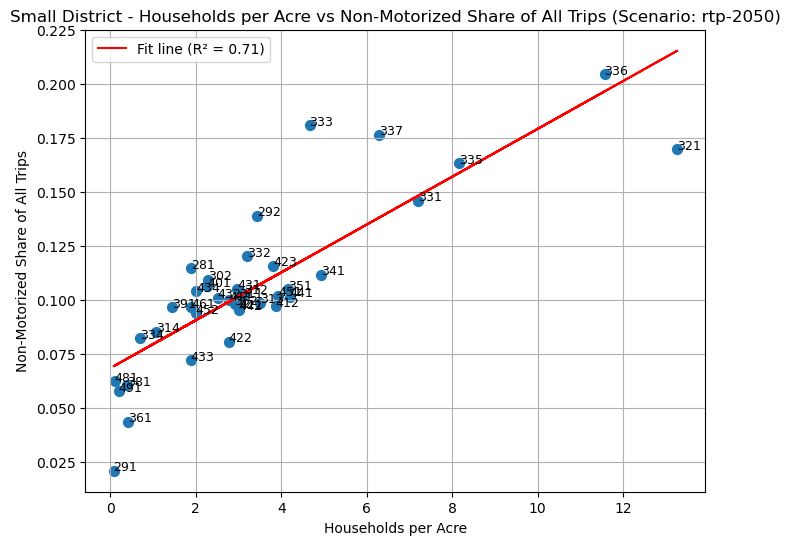

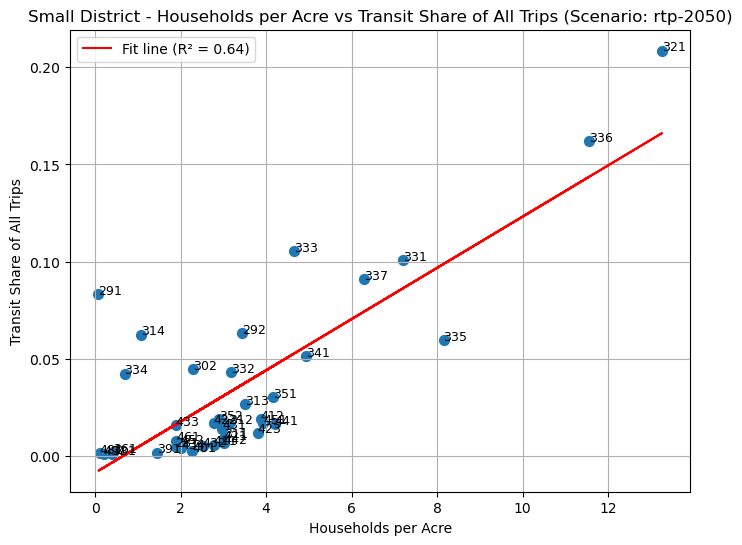

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

filtered_dsml_density_trips_df = dsml_density_trips_df[dsml_density_trips_df['TOTHH'] > 100]

def plot_relationships(df, main_var, main_var_alias, related_vars, related_vars_aliases, label_var, scenario_var):
    # Get unique scenario values
    scenarios = df[scenario_var].unique()
    
    # Loop through each scenario
    for scenario in scenarios:
        # Filter the dataframe for the current scenario
        scenario_data = df[df[scenario_var] == scenario]
        
        # Loop through each related variable
        for related_var, related_vars_alias in zip(related_vars, related_vars_aliases):
            plt.figure(figsize=(8, 6))
            
            # Scatter plot
            plt.scatter(scenario_data[main_var], scenario_data[related_var], s=50)
            
            # Perform linear regression
            X = scenario_data[main_var].values.reshape(-1, 1)
            y = scenario_data[related_var].values
            
            # Fit the model
            model = LinearRegression().fit(X, y)
            y_pred = model.predict(X)
            
            # Calculate R-squared
            r_squared = r2_score(y, y_pred)
            
            # Plot the regression line
            plt.plot(scenario_data[main_var], y_pred, color='red', label=f'Fit line (R² = {r_squared:.2f})')
            
            # Label each point with the DISTSML field
            for i in range(scenario_data.shape[0]):
                plt.text(scenario_data[main_var].iloc[i], scenario_data[related_var].iloc[i], 
                         scenario_data[label_var].iloc[i], fontsize=9)
            
            # Titles and labels
            plt.title(f'Small District - {main_var_alias} vs {related_vars_alias} (Scenario: {scenario})')
            plt.xlabel(main_var_alias)
            plt.ylabel(related_vars_alias)
            plt.legend()
            plt.grid(True)
            plt.show()

# Example usage with a DataFrame (df):
related_vars = ['NonM_pct', 'tTrn_pct']
related_vars_aliases = ['Non-Motorized Share of All Trips', 'Transit Share of All Trips']
plot_relationships(filtered_dsml_density_trips_df, 'hh_per_acre', 'Households per Acre', related_vars, related_vars_aliases, 'DISTSML', 'scenario')


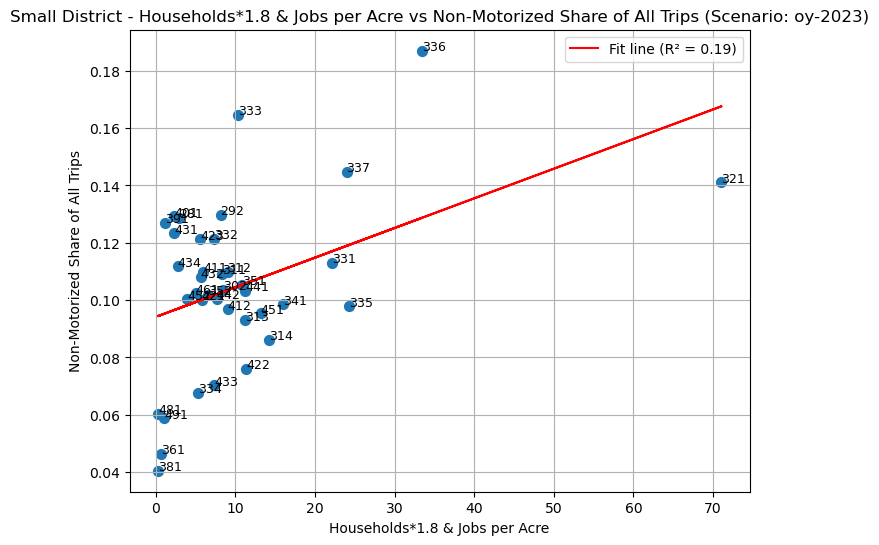

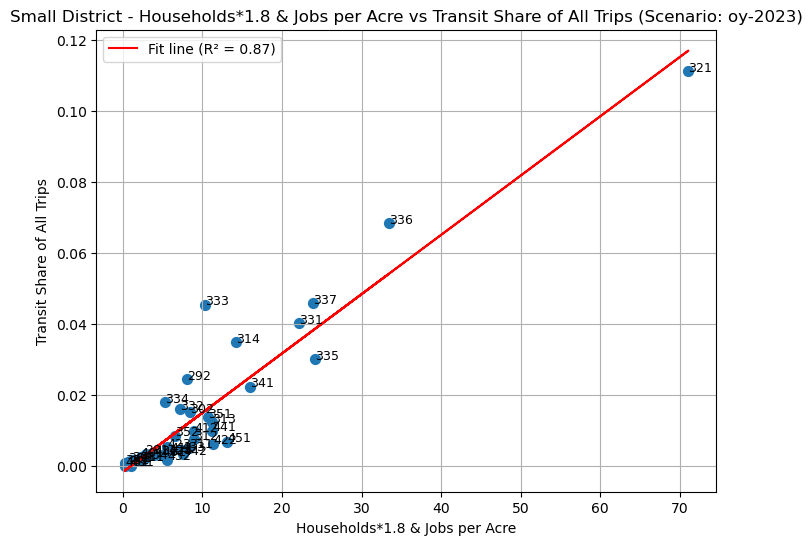

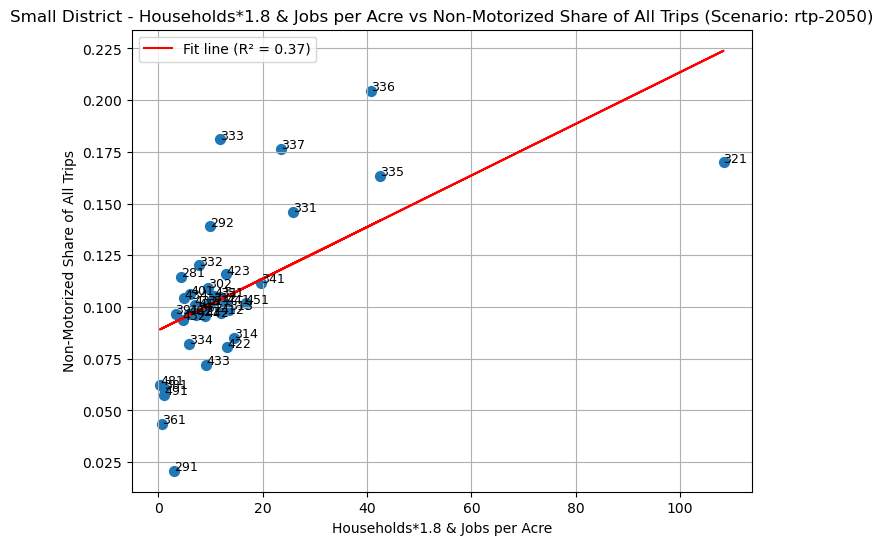

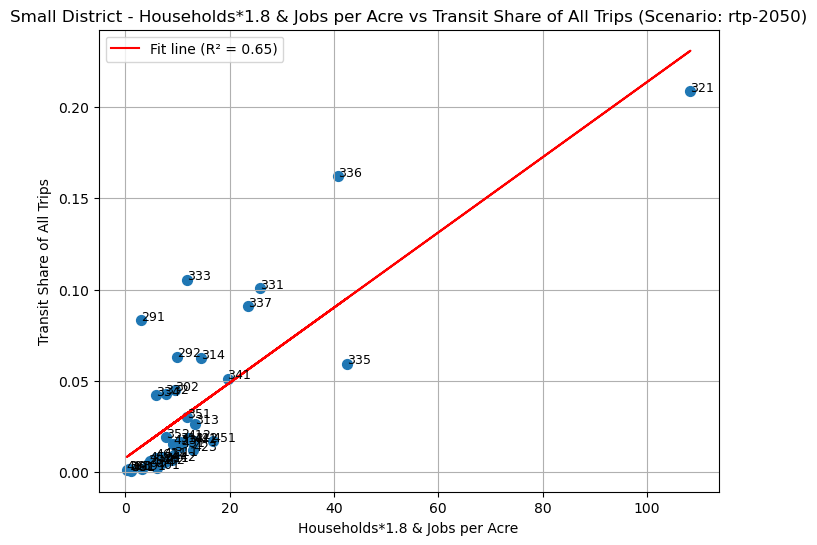

In [23]:
# Example usage with a DataFrame (df):
related_vars = ['NonM_pct', 'tTrn_pct']
related_vars_aliases = ['Non-Motorized Share of All Trips', 'Transit Share of All Trips']
plot_relationships(filtered_dsml_density_trips_df, 'hh_job_per_acre', 'Households*1.8 & Jobs per Acre', related_vars, related_vars_aliases, 'DISTSML', 'scenario')


In [24]:
dsml_density_trips_df[dsml_density_trips_df['DISTSML']==291]

,scenario,DISTSML,DSML_NAME,TOTHH,TOTEMP,DEVACRES,hh_per_acre,hh_job_per_acre,NonM,tTrn,Auto,All,NonM_pct,tTrn_pct,Auto_pct
3,oy-2023,291,Small District 291,60.833333,18350.500000,8384.66945,0.007255,2.201637,1245.56,2652.19,70757.45,74655.17,0.016684,0.035526,0.947790
50,rtp-2050,291,Small District 291,631.500000,24857.333333,8384.66945,0.075316,3.100186,2674.96,10690.25,114890.90,128256.11,0.020856,0.083351,0.895793


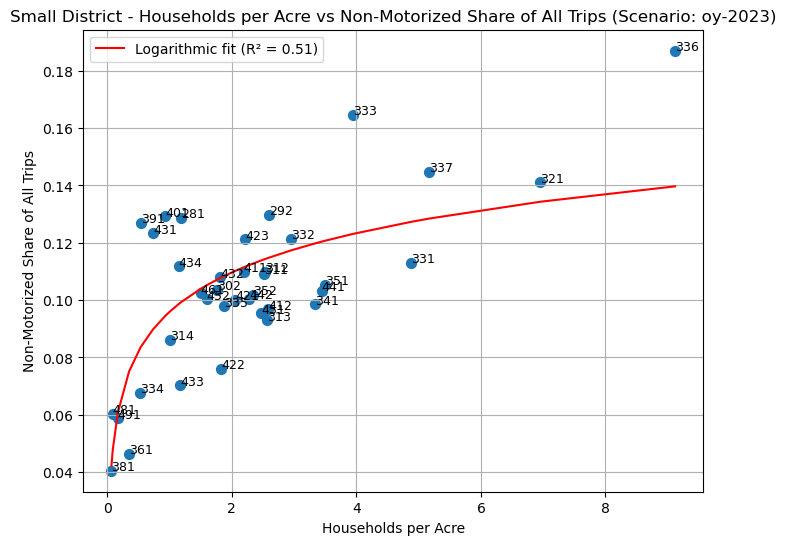

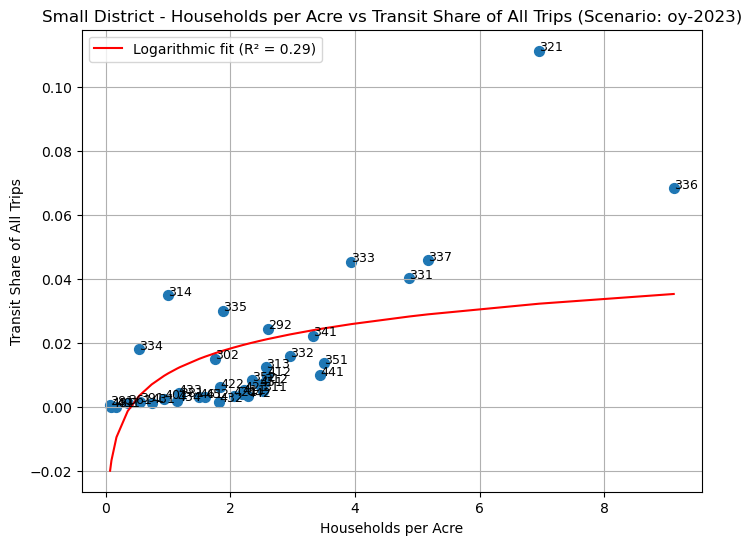

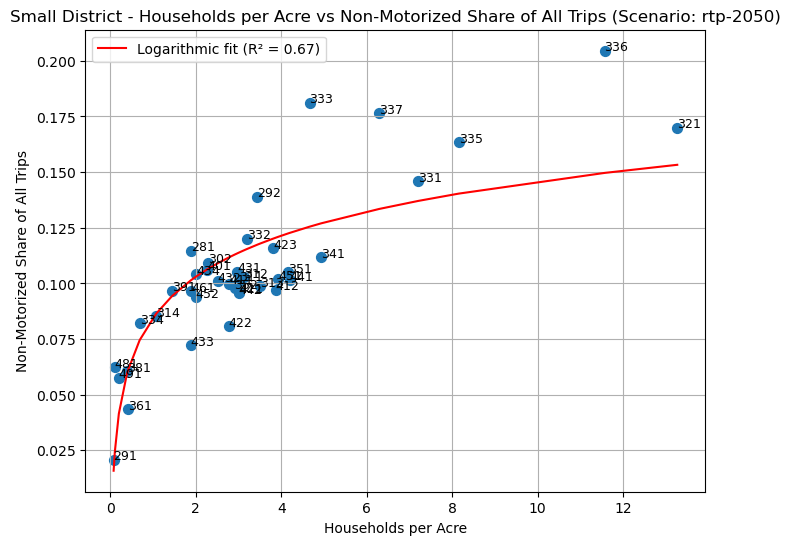

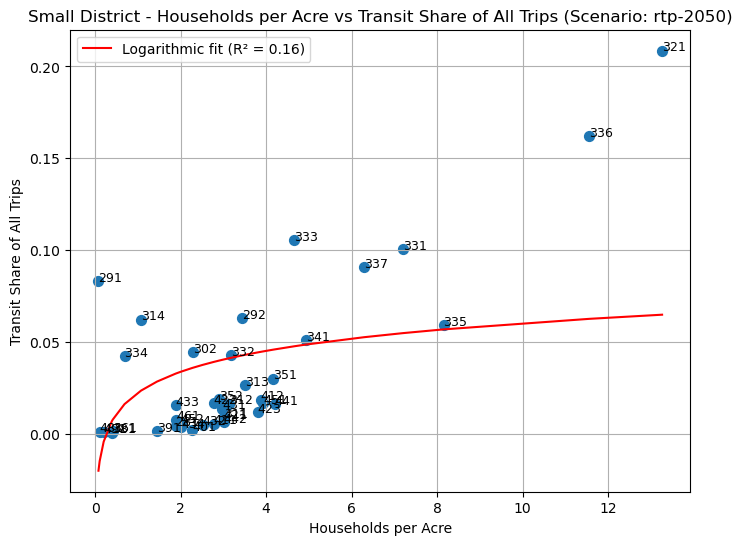

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

filtered_dsml_density_trips_df = dsml_density_trips_df[dsml_density_trips_df['TOTHH'] > 100]

# Logarithmic function
def logarithmic_func(x, a, b):
    return a * np.log(x) + b

def plot_relationships(df, main_var, main_var_alias, related_vars, related_vars_aliases, label_var, scenario_var):
    # Get unique scenario values
    scenarios = df[scenario_var].unique()
    
    # Loop through each scenario
    for scenario in scenarios:
        # Filter the dataframe for the current scenario
        scenario_data = df[df[scenario_var] == scenario]
        
        # Loop through each related variable
        for related_var, related_vars_alias in zip(related_vars, related_vars_aliases):
            plt.figure(figsize=(8, 6))
            
            # Sort the data by the main variable (x-axis)
            scenario_data = scenario_data.sort_values(by=main_var)
            
            # Scatter plot
            plt.scatter(scenario_data[main_var], scenario_data[related_var], s=50)
            
            # Perform logarithmic curve fitting (ignore x <= 0)
            X = scenario_data[main_var].values
            y = scenario_data[related_var].values
            X = X[X > 0]  # log is undefined for non-positive numbers
            y = y[:len(X)]  # Ensure y has the same length as X
            
            # Fit the logarithmic model
            popt, pcov = curve_fit(logarithmic_func, X, y, maxfev=10000)
            a, b = popt
            
            # Predict y values based on the fitted curve
            y_pred = logarithmic_func(X, a, b)
            
            # Calculate R-squared
            r_squared = r2_score(y, y_pred)
            
            # Plot the logarithmic fit curve
            plt.plot(X, y_pred, color='red', label=f'Logarithmic fit (R² = {r_squared:.2f})')
            
            # Label each point with the DISTSML field
            for i in range(scenario_data.shape[0]):
                plt.text(scenario_data[main_var].iloc[i], scenario_data[related_var].iloc[i], 
                         scenario_data[label_var].iloc[i], fontsize=9)
            
            # Titles and labels
            plt.title(f'Small District - {main_var_alias} vs {related_vars_alias} (Scenario: {scenario})')
            plt.xlabel(main_var_alias)
            plt.ylabel(related_vars_alias)
            plt.legend()
            plt.grid(True)
            plt.show()

# Example usage with a DataFrame (df):
related_vars = ['NonM_pct', 'tTrn_pct']
related_vars_aliases = ['Non-Motorized Share of All Trips', 'Transit Share of All Trips']
plot_relationships(filtered_dsml_density_trips_df, 'hh_per_acre', 'Households per Acre', related_vars, related_vars_aliases, 'DISTSML', 'scenario')


In [128]:
#NearTOD6 => High Density (hh_per_acre > 6) and Transit Stop Density (3xrail + 1xbus)
#NearTOD4 => High Density (hh_per_acre > 6) and Transit Stop Density (3xrail + 1xbus)
#Region   => All



In [26]:
dsml_df = taz_gdf.groupby(['DISTSML','DSML_NAME'], as_index=False).agg(DEVACRES=('DEVACRES','sum'))
dsml_df

,DISTSML,DSML_NAME,DEVACRES
0,261,Small District 261,11090.230472
1,271,Small District 271,6712.584424
2,281,Small District 281,14367.905283
3,291,Small District 291,8384.669450
4,292,Small District 292,4336.878668
5,301,Small District 301,7900.242191
6,302,Small District 302,3946.946047
7,311,Small District 311,10606.473348
8,312,Small District 312,6170.315555
9,313,Small District 313,9394.416089


In [27]:
import geopandas as gpd

# Read the stops data
stops_with_max_mode_gdf = gpd.read_file('results/stops_with_max_mode.geojson')
stops_with_max_mode_gdf

,STOPID,TAZID,DISTSML,DISTMED,DISTLRG,DISTSUPER,DSUP_NAME,CITY_NAME,PLANAREA,SUBAREAID,scenario,MaxMode,Boardings,geometry
0,424680_4497040,1803.0,441.0,44.0,17.0,6.0,Salt Lake County,Midvale,WFRC,1.0,rtp-2050,4,415.70,POINT (-111.89049 40.62076)
1,437580_4462640,2811.0,584.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,10.73,POINT (-111.73461 40.31195)
2,438320_4462620,2811.0,584.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,9.52,POINT (-111.72590 40.31182)
3,438580_4462620,2836.0,583.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,62.55,POINT (-111.72284 40.31184)
4,439240_4462640,2812.0,583.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,279.66,POINT (-111.71507 40.31207)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,424220_4501380,1633.0,341.0,34.0,14.0,6.0,Salt Lake County,Murray,WFRC,1.0,oy-2023,6,1464.48,POINT (-111.89645 40.65981)
319,424220_4501380,1633.0,341.0,34.0,14.0,6.0,Salt Lake County,Murray,WFRC,1.0,rtp-2050,6,6729.42,POINT (-111.89645 40.65981)
320,413240_4490620,1967.0,423.0,42.0,16.0,6.0,Salt Lake County,South Jordan,WFRC,1.0,oy-2023,5,3.37,POINT (-112.02484 40.56181)
321,413240_4490620,1967.0,423.0,42.0,16.0,6.0,Salt Lake County,South Jordan,WFRC,1.0,rtp-2050,5,121.93,POINT (-112.02484 40.56181)


In [28]:
# Assuming stop_taz_df is your dataframe and 'MaxMode' is the relevant column
def assign_values(row):
    if row['MaxMode'] in [7, 8]:
        return 3
    elif row['MaxMode'] != 0:
        return 1
    else:
        return 0

# Apply the function to the dataframe
stops_with_max_mode_gdf['mode_weight'] = stops_with_max_mode_gdf.apply(assign_values, axis=1)

# Display the updated dataframe
display(stops_with_max_mode_gdf.head())

,STOPID,TAZID,DISTSML,DISTMED,DISTLRG,DISTSUPER,DSUP_NAME,CITY_NAME,PLANAREA,SUBAREAID,scenario,MaxMode,Boardings,geometry,mode_weight
0,424680_4497040,1803.0,441.0,44.0,17.0,6.0,Salt Lake County,Midvale,WFRC,1.0,rtp-2050,4,415.70,POINT (-111.89049 40.62076),1
1,437580_4462640,2811.0,584.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,10.73,POINT (-111.73461 40.31195),1
2,438320_4462620,2811.0,584.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,9.52,POINT (-111.72590 40.31182),1
3,438580_4462620,2836.0,583.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,62.55,POINT (-111.72284 40.31184),1
4,439240_4462640,2812.0,583.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,279.66,POINT (-111.71507 40.31207),1


In [29]:
stop_dsml_df = stops_with_max_mode_gdf.groupby(['scenario','DISTSML'], as_index=False).agg(mode_weight_sum=('mode_weight','sum'))
stop_dsml_df

,scenario,DISTSML,mode_weight_sum
0,oy-2023,111.0,1
1,oy-2023,121.0,6
2,oy-2023,122.0,7
3,oy-2023,132.0,3
4,oy-2023,133.0,1
...,...,...,...
76,rtp-2050,593.0,1
77,rtp-2050,594.0,5
78,rtp-2050,601.0,1
79,rtp-2050,602.0,1


In [30]:
stop_dsml_density_df = pd.merge(stop_dsml_df, dsml_df, on='DISTSML')
stop_dsml_density_df['mode_weight_sum_per_acre'] = stop_dsml_density_df['mode_weight_sum'] / stop_dsml_density_df['DEVACRES']
stop_dsml_density_df


,scenario,DISTSML,mode_weight_sum,DSML_NAME,DEVACRES,mode_weight_sum_per_acre
0,oy-2023,291.0,2,Small District 291,8384.669450,0.000239
1,rtp-2050,291.0,2,Small District 291,8384.669450,0.000239
2,oy-2023,292.0,2,Small District 292,4336.878668,0.000461
3,rtp-2050,292.0,2,Small District 292,4336.878668,0.000461
4,oy-2023,312.0,1,Small District 312,6170.315555,0.000162
5,rtp-2050,312.0,1,Small District 312,6170.315555,0.000162
6,oy-2023,313.0,3,Small District 313,9394.416089,0.000319
7,rtp-2050,313.0,3,Small District 313,9394.416089,0.000319
8,oy-2023,321.0,13,Small District 321,1667.377097,0.007797
9,rtp-2050,321.0,35,Small District 321,1667.377097,0.020991


In [31]:
stop_dsml_density_df.describe()

,DISTSML,mode_weight_sum,DEVACRES,mode_weight_sum_per_acre
count,37.000000,37.000000,37.000000,37.000000
mean,364.405405,4.945946,4848.661836,0.002590
std,56.350816,6.315527,2907.811614,0.004372
min,291.000000,1.000000,107.681660,0.000146
25%,321.000000,1.000000,2386.235616,0.000319
50%,338.000000,3.000000,4522.560908,0.000595
75%,423.000000,5.000000,7610.015339,0.002067
max,461.000000,35.000000,9394.416089,0.020991


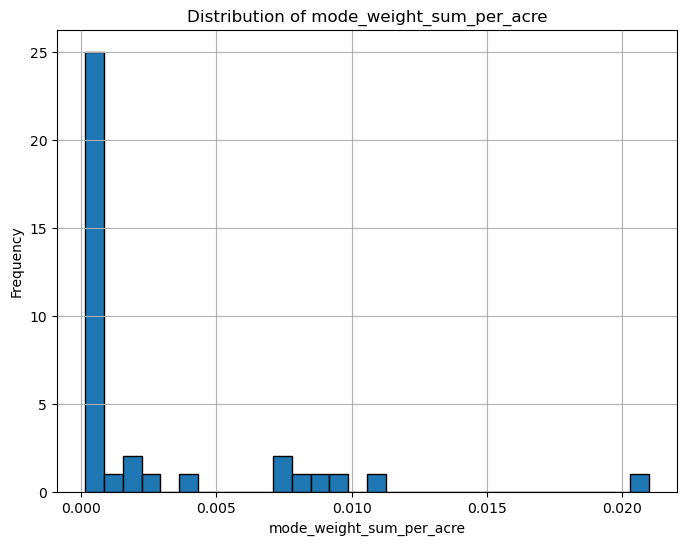

In [32]:
import matplotlib.pyplot as plt

# Assuming stop_dsml_df is your DataFrame with the field 'mode_weight_sum_per_acre'
def plot_histogram(df, field, bins=30):
    plt.figure(figsize=(8, 6))
    plt.hist(df[field], bins=bins, edgecolor='black')
    plt.title(f'Distribution of {field}')
    plt.xlabel(field)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
plot_histogram(stop_dsml_density_df, 'mode_weight_sum_per_acre')




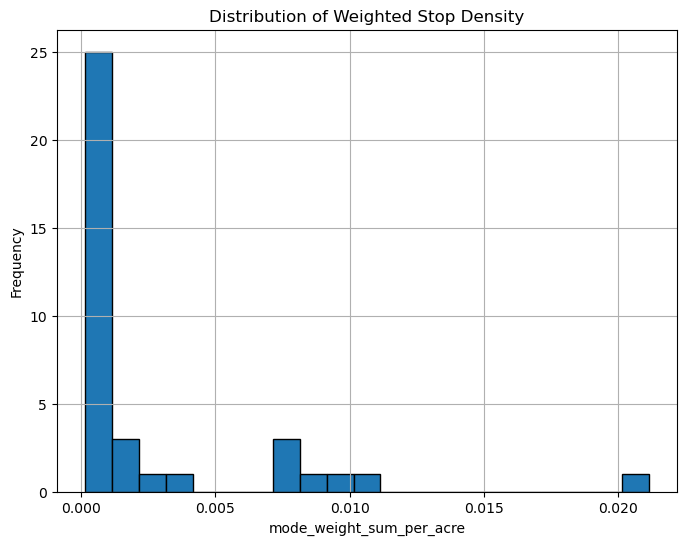

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming stop_dsml_df is your DataFrame with the field 'mode_weight_sum_per_acre'
def plot_histogram(df, field, bin_size=0.001):
    # Define the bin edges based on the minimum and maximum values of the field
    min_value = df[field].min()
    max_value = df[field].max()
    bins = np.arange(min_value, max_value + bin_size, bin_size)  # Create bins with a width of 0.02
    
    plt.figure(figsize=(8, 6))
    plt.hist(df[field], bins=bins, edgecolor='black')
    plt.title(f'Distribution of Weighted Stop Density')
    plt.xlabel(field)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
plot_histogram(stop_dsml_density_df, 'mode_weight_sum_per_acre', bin_size=0.001)


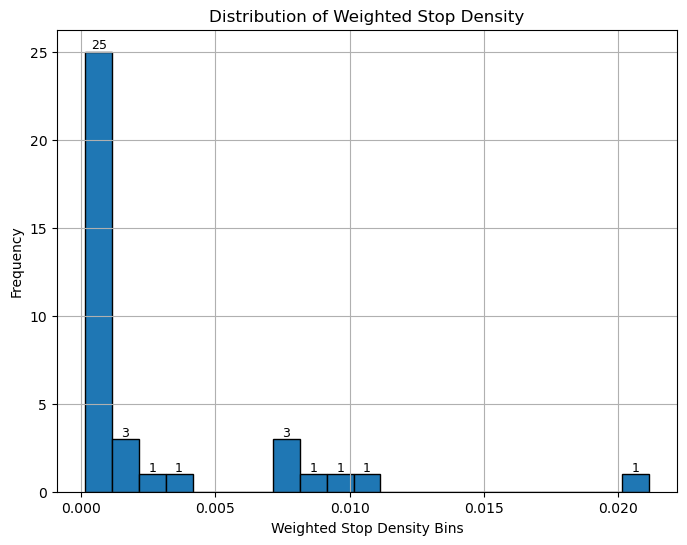

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming stop_dsml_df is your DataFrame with the field 'mode_weight_sum_per_acre'
def plot_histogram(df, field, bin_size=0.001):
    # Define the bin edges based on the minimum and maximum values of the field
    min_value = df[field].min()
    max_value = df[field].max()
    bins = np.arange(min_value, max_value + bin_size, bin_size)  # Create bins with a width of 0.02
    
    plt.figure(figsize=(8, 6))
    
    # Capture the histogram data
    counts, bins, patches = plt.hist(df[field], bins=bins, edgecolor='black')
    
    # Label each bar with its frequency
    for count, patch in zip(counts, patches):
        if count > 0:  # Only label non-zero counts
            height = patch.get_height()
            plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', 
                     ha='center', va='bottom', fontsize=9)


    plt.title(f'Distribution of Weighted Stop Density')
    plt.xlabel('Weighted Stop Density Bins')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
plot_histogram(stop_dsml_density_df, 'mode_weight_sum_per_acre', bin_size=0.001)


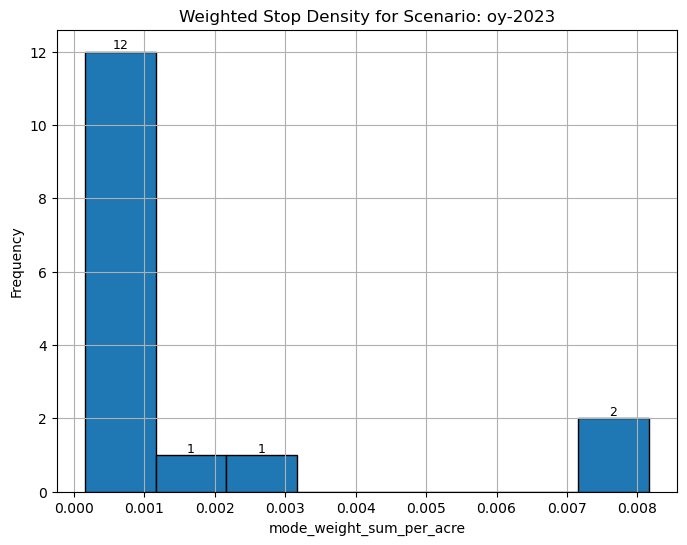

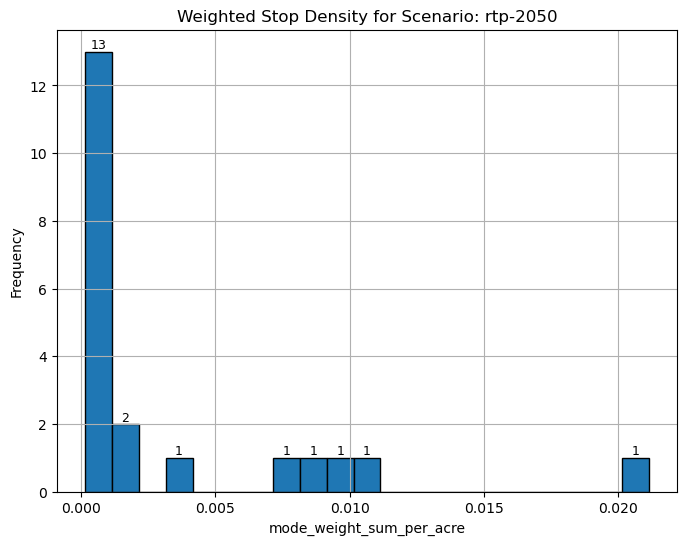

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming stop_dsml_df is your DataFrame with the field 'mode_weight_sum_per_acre' and 'scenario'
def plot_histograms_by_scenario(df, field, scenario_field, bin_size=0.001):
    # Get the unique scenarios
    scenarios = df[scenario_field].unique()
    
    # Loop through each scenario
    for scenario in scenarios:
        # Filter the dataframe for the current scenario
        scenario_data = df[df[scenario_field] == scenario]
        
        # Define the bin edges based on the minimum and maximum values of the field
        min_value = scenario_data[field].min()
        max_value = scenario_data[field].max()
        bins = np.arange(min_value, max_value + bin_size, bin_size)  # Create bins with a specified bin width
        
        plt.figure(figsize=(8, 6))
        
        # Capture the histogram data
        counts, bins, patches = plt.hist(scenario_data[field], bins=bins, edgecolor='black')
        
        # Label each bar with its frequency if the count is not zero
        for count, patch in zip(counts, patches):
            if count > 0:  # Only label non-zero counts
                height = patch.get_height()
                plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', 
                         ha='center', va='bottom', fontsize=9)
        
        # Titles and labels
        plt.title(f'Weighted Stop Density for Scenario: {scenario}')
        plt.xlabel(field)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Example usage
plot_histograms_by_scenario(stop_dsml_density_df, 'mode_weight_sum_per_acre', 'scenario', bin_size=0.001)


## Use 0.005 as cutoff

In [ ]:
#NearTOD6 => High Density (hh_per_acre > 6) and Transit Stop Density (3xrail + 1xbus) > 0.005
#NearTOD4 => High Density (hh_per_acre > 6) and Transit Stop Density (3xrail + 1xbus) > 0.005
#Region   => All

In [36]:
filtered_dsml_density_trips_df = dsml_density_trips_df[dsml_density_trips_df['TOTHH'] > 100]
filtered_dsml_density_trips_df

,scenario,DISTSML,DSML_NAME,TOTHH,TOTEMP,DEVACRES,hh_per_acre,hh_job_per_acre,NonM,tTrn,Auto,All,NonM_pct,tTrn_pct,Auto_pct
2,oy-2023,281,Small District 281,17071.000000,10484.333333,14367.905283,1.188134,2.868347,36096.65,946.43,243281.49,280324.61,0.128767,0.003376,0.867856
4,oy-2023,292,Small District 292,11272.000000,14938.666667,4336.878668,2.599104,8.122954,23251.69,4379.76,151482.03,179113.45,0.129815,0.024452,0.845732
6,oy-2023,302,Small District 302,6936.833333,21011.666667,3946.946047,1.757519,8.487060,15196.91,2218.78,129129.87,146545.58,0.103701,0.015141,0.881158
7,oy-2023,311,Small District 311,26717.000000,39788.333333,10606.473348,2.518933,8.285406,57093.58,2664.58,462649.02,522407.18,0.109289,0.005101,0.885610
8,oy-2023,312,Small District 312,15662.000000,27400.333333,6170.315555,2.538282,9.009577,31445.34,2168.50,252504.96,286118.85,0.109903,0.007579,0.882518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,rtp-2050,451,Small District 451,23430.333333,57744.833333,5959.709641,3.931456,16.765822,47104.91,7799.15,407201.60,462105.61,0.101935,0.016877,0.881187
88,rtp-2050,452,Small District 452,12055.000000,6495.333333,6040.332509,1.995751,4.667679,15943.03,1075.34,152867.68,169886.00,0.093845,0.006330,0.899825
89,rtp-2050,461,Small District 461,12948.333333,16559.000000,6830.185424,1.895751,5.836738,19757.61,1615.66,183367.41,204740.71,0.096501,0.007891,0.895608
91,rtp-2050,481,Small District 481,192.000000,232.500000,1855.724972,0.103464,0.311522,190.59,4.00,2857.93,3052.52,0.062437,0.001310,0.936253


In [37]:
filtered_dsml_density_trips_stops_df = pd.merge(filtered_dsml_density_trips_df[['scenario','DISTSML','DSML_NAME','NonM','tTrn','Auto','All','hh_per_acre']], stop_dsml_density_df[['scenario','DISTSML','mode_weight_sum_per_acre']], on=(['scenario','DISTSML']))
filtered_dsml_density_trips_stops_df

,scenario,DISTSML,DSML_NAME,NonM,tTrn,Auto,All,hh_per_acre,mode_weight_sum_per_acre
0,oy-2023,292,Small District 292,23251.69,4379.76,151482.03,179113.45,2.599104,0.000461
1,oy-2023,312,Small District 312,31445.34,2168.50,252504.96,286118.85,2.538282,0.000162
2,oy-2023,313,Small District 313,40007.27,5325.42,385158.10,430490.80,2.565709,0.000319
3,oy-2023,321,Small District 321,61116.84,48150.04,323520.03,432786.82,6.954536,0.007797
4,oy-2023,331,Small District 331,36470.21,12943.06,273009.80,322423.00,4.874356,0.002846
5,oy-2023,333,Small District 333,18315.78,5046.25,87857.23,111219.24,3.942402,0.000419
6,oy-2023,336,Small District 336,35711.41,13047.24,142197.07,190955.64,9.117327,0.002067
7,oy-2023,341,Small District 341,51604.28,11685.22,460599.59,523889.15,3.328999,0.000602
8,oy-2023,412,Small District 412,37513.97,3792.56,345783.15,387089.71,2.584641,0.000595
9,oy-2023,422,Small District 422,14679.42,1201.19,177178.71,193059.27,1.830049,0.000241


In [38]:
# Assuming stop_taz_df is your dataframe and 'MaxMode' is the relevant column
def assign_hh_density_category(row):
    if row['hh_per_acre'] > 6:
        return ['HH>6upa', 'HH>4upa', 'All HH']
    elif row['hh_per_acre'] > 4:
        return ['HH>4upa', 'All HH']
    else:
        return ['All HH']
    
# Assuming stop_taz_df is your dataframe and 'MaxMode' is the relevant column
def assign_stop_density_category(row):
    if row['mode_weight_sum_per_acre'] > 0.005:
        return ['High Transit', 'All Transit']
    else:
        return ['All Transit']

# Apply the function to the dataframe
filtered_dsml_density_trips_stops_df['hh_density_category'] = filtered_dsml_density_trips_stops_df.apply(assign_hh_density_category, axis=1)
filtered_dsml_density_trips_stops_df['stop_density_category'] = filtered_dsml_density_trips_stops_df.apply(assign_stop_density_category, axis=1)

filtered_dsml_density_trips_stops_df

,scenario,DISTSML,DSML_NAME,NonM,tTrn,Auto,All,hh_per_acre,mode_weight_sum_per_acre,hh_density_category,stop_density_category
0,oy-2023,292,Small District 292,23251.69,4379.76,151482.03,179113.45,2.599104,0.000461,[All HH],[All Transit]
1,oy-2023,312,Small District 312,31445.34,2168.50,252504.96,286118.85,2.538282,0.000162,[All HH],[All Transit]
2,oy-2023,313,Small District 313,40007.27,5325.42,385158.10,430490.80,2.565709,0.000319,[All HH],[All Transit]
3,oy-2023,321,Small District 321,61116.84,48150.04,323520.03,432786.82,6.954536,0.007797,"[HH>6upa, HH>4upa, All HH]","[High Transit, All Transit]"
4,oy-2023,331,Small District 331,36470.21,12943.06,273009.80,322423.00,4.874356,0.002846,"[HH>4upa, All HH]",[All Transit]
5,oy-2023,333,Small District 333,18315.78,5046.25,87857.23,111219.24,3.942402,0.000419,[All HH],[All Transit]
6,oy-2023,336,Small District 336,35711.41,13047.24,142197.07,190955.64,9.117327,0.002067,"[HH>6upa, HH>4upa, All HH]",[All Transit]
7,oy-2023,341,Small District 341,51604.28,11685.22,460599.59,523889.15,3.328999,0.000602,[All HH],[All Transit]
8,oy-2023,412,Small District 412,37513.97,3792.56,345783.15,387089.71,2.584641,0.000595,[All HH],[All Transit]
9,oy-2023,422,Small District 422,14679.42,1201.19,177178.71,193059.27,1.830049,0.000241,[All HH],[All Transit]


In [39]:
exploded_df = filtered_dsml_density_trips_stops_df.drop(columns=(['hh_per_acre','mode_weight_sum_per_acre','DISTSML','DSML_NAME'])).explode('hh_density_category').explode('stop_density_category')
exploded_df

,scenario,NonM,tTrn,Auto,All,hh_density_category,stop_density_category
0,oy-2023,23251.69,4379.76,151482.03,179113.45,All HH,All Transit
1,oy-2023,31445.34,2168.50,252504.96,286118.85,All HH,All Transit
2,oy-2023,40007.27,5325.42,385158.10,430490.80,All HH,All Transit
3,oy-2023,61116.84,48150.04,323520.03,432786.82,HH>6upa,High Transit
3,oy-2023,61116.84,48150.04,323520.03,432786.82,HH>6upa,All Transit
...,...,...,...,...,...,...,...
29,rtp-2050,13847.85,3014.46,175017.14,191879.44,All HH,All Transit
30,rtp-2050,48937.58,7836.98,425122.33,481896.88,HH>4upa,All Transit
30,rtp-2050,48937.58,7836.98,425122.33,481896.88,All HH,All Transit
31,rtp-2050,47104.91,7799.15,407201.60,462105.61,All HH,All Transit


In [40]:
summary_df = exploded_df.groupby(['scenario','hh_density_category','stop_density_category'], as_index=False).sum()
summary_df = summary_df.set_index(['scenario','hh_density_category','stop_density_category'])
summary_df['Non-Motorized'] = summary_df['NonM'] / summary_df['All']
summary_df['Transit'      ] = summary_df['tTrn'] / summary_df['All']
summary_df['Auto'         ] = summary_df['Auto'] / summary_df['All']
summary_df.drop(columns=(['NonM','tTrn','All']), inplace=True)
summary_df

Auto  Non-Motorized  \
scenario hh_density_category stop_density_category                            
oy-2023  All HH              All Transit            0.861798       0.110599   
                             High Transit           0.747527       0.141217   
         HH>4upa             All Transit            0.780759       0.140883   
                             High Transit           0.747527       0.141217   
         HH>6upa             All Transit            0.746650       0.155238   
                             High Transit           0.747527       0.141217   
rtp-2050 All HH              All Transit            0.823009       0.118261   
                             High Transit           0.626741       0.178900   
         HH>4upa             All Transit            0.752250       0.143280   
                             High Transit           0.626741       0.178900   
         HH>6upa             All Transit            0.672075       0.168822   
                             High Transit           0.626741       0.178900   

                                                     Transit  
scenario hh_density_category stop_density_category            
oy-2023  All HH              All Transit            0.027603  
                             High Transit           0.111256  
         HH>4upa             All Transit            0.078359  
                             High Transit           0.111256  
         HH>6upa             All Transit            0.098113  
                             High Transit           0.111256  
rtp-2050 All HH              All Transit            0.058730  
                             High Transit           0.194359  
         HH>4upa             All Transit            0.104470  
                             High Transit           0.194359  
         HH>6upa             All Transit            0.159103  
                             High Transit           0.194359

In [41]:
exploded_df

,scenario,NonM,tTrn,Auto,All,hh_density_category,stop_density_category
0,oy-2023,23251.69,4379.76,151482.03,179113.45,All HH,All Transit
1,oy-2023,31445.34,2168.50,252504.96,286118.85,All HH,All Transit
2,oy-2023,40007.27,5325.42,385158.10,430490.80,All HH,All Transit
3,oy-2023,61116.84,48150.04,323520.03,432786.82,HH>6upa,High Transit
3,oy-2023,61116.84,48150.04,323520.03,432786.82,HH>6upa,All Transit
...,...,...,...,...,...,...,...
29,rtp-2050,13847.85,3014.46,175017.14,191879.44,All HH,All Transit
30,rtp-2050,48937.58,7836.98,425122.33,481896.88,HH>4upa,All Transit
30,rtp-2050,48937.58,7836.98,425122.33,481896.88,All HH,All Transit
31,rtp-2050,47104.91,7799.15,407201.60,462105.61,All HH,All Transit


In [42]:
# Group by and get the sum, then also get the count of records
summary_df = exploded_df.groupby(['scenario', 'hh_density_category', 'stop_density_category'], as_index=False).agg(
    NonM=('NonM', 'sum'), 
    tTrn=('tTrn', 'sum'), 
    Auto=('Auto', 'sum'), 
    All=('All', 'sum'), 
    Dist_Count=('scenario', 'size')  # Count the number of records for each group
)

# Set the index
summary_df = summary_df.set_index(['scenario', 'hh_density_category', 'stop_density_category'])

# Calculate proportions
summary_df['Non-Motorized'] = summary_df['NonM'] / summary_df['All']
summary_df['Transit'] = summary_df['tTrn'] / summary_df['All']
summary_df['Auto'] = summary_df['Auto'] / summary_df['All']

# Drop unnecessary columns
summary_df.drop(columns=(['NonM', 'tTrn', 'All']), inplace=True)

# Display summary_df
display(summary_df[['Dist_Count']])



Dist_Count
scenario hh_density_category stop_density_category            
oy-2023  All HH              All Transit                    14
                             High Transit                    1
         HH>4upa             All Transit                     3
                             High Transit                    1
         HH>6upa             All Transit                     2
                             High Transit                    1
rtp-2050 All HH              All Transit                    19
                             High Transit                    3
         HH>4upa             All Transit                     8
                             High Transit                    3
         HH>6upa             All Transit                     5
                             High Transit                    3

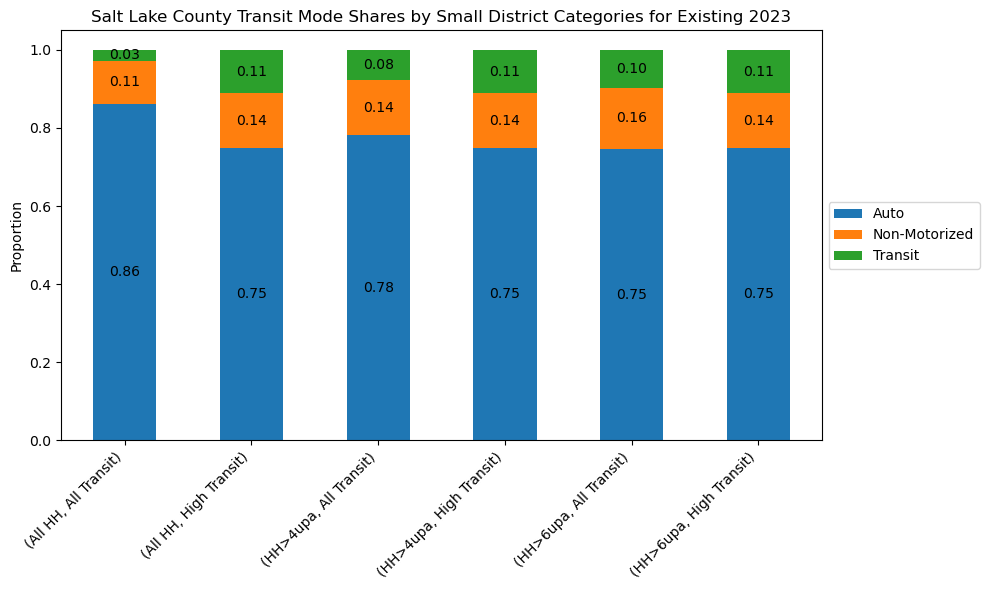

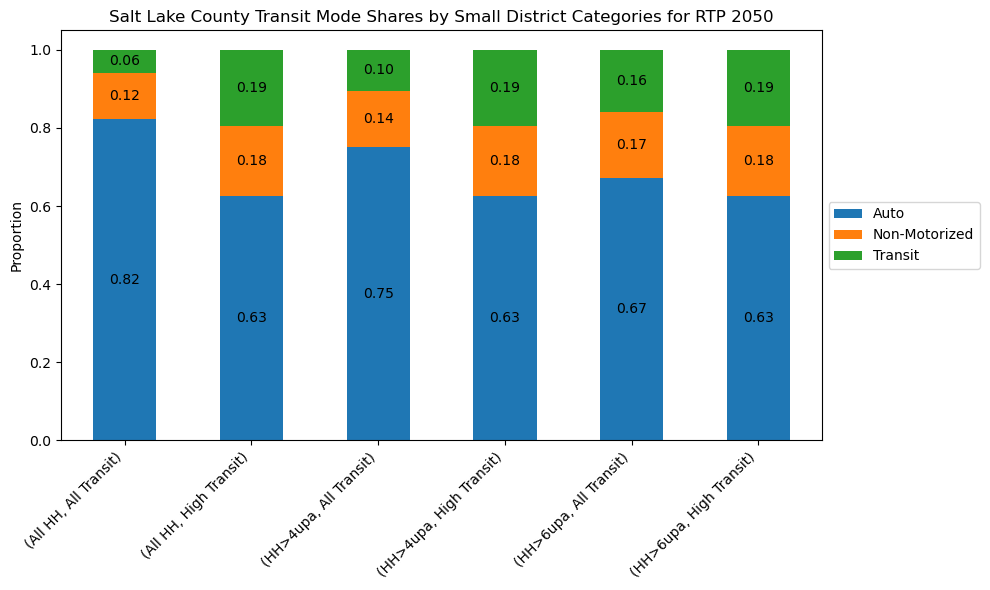

In [44]:
import matplotlib.pyplot as plt

def plot_stacked_bar_chart_with_labels(summary_df):
    # Reset the index to plot the categories
    summary_df = summary_df.reset_index()

    # Create a pivot table to prepare data for stacked bar chart
    pivot_df = summary_df.pivot_table(index=['scenario', 'hh_density_category', 'stop_density_category'],
                                      values=['Non-Motorized', 'Transit', 'Auto'])
    
    # Plotting each scenario as a separate stacked bar chart
    for scenario in summary_df['scenario'].unique():
        scenario_data = pivot_df.xs(scenario, level='scenario')

        # Custom title based on scenario
        if scenario == 'oy-2023':
            title = 'Existing 2023'
        elif scenario == 'rtp-2050':
            title = 'RTP 2050'
        else:
            title = scenario  # Default to the scenario name if not matched

        ax = scenario_data.plot(kind='bar', stacked=True, figsize=(10, 6))
        
        # Move the legend outside of the plot
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

        # Add data labels on top of the bars
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x = p.get_x()
            y = p.get_y()
            
            if height > 0:  # Label only if there is a value
                ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center')

        plt.title(f'Salt Lake County Transit Mode Shares by Small District Categories for {title}')
        plt.xlabel('')
        plt.ylabel('Proportion')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Example usage
plot_stacked_bar_chart_with_labels(summary_df)

